<a href="https://colab.research.google.com/github/kanagapriya3/Image-Processing-and-Analysis/blob/main/Copy_of_lungs_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#lung disease for image segmentation

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


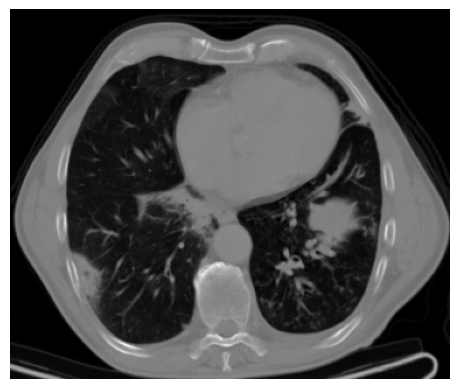

In [ ]:
img = cv2.imread('/content/lung ct image.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

Threshold limit:71.0


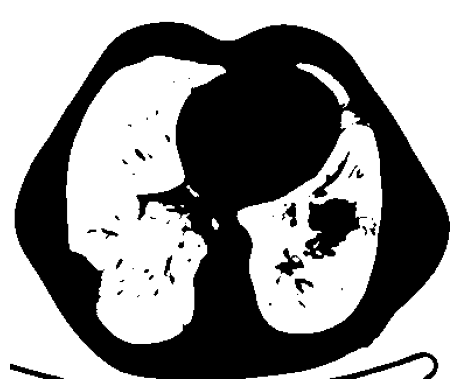

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit:"+str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

In [ ]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

#sure background areas
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

#sure foreground areas
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret ,sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


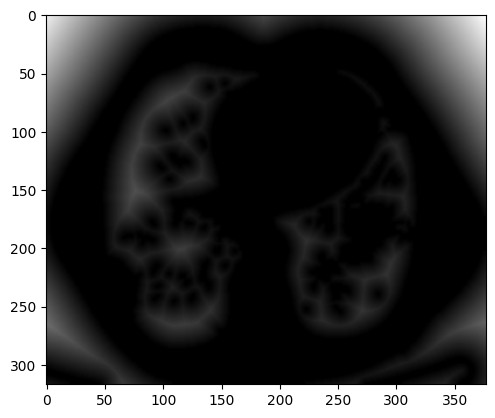

In [ ]:
plt.imshow(dist_transform, cmap = 'gray')

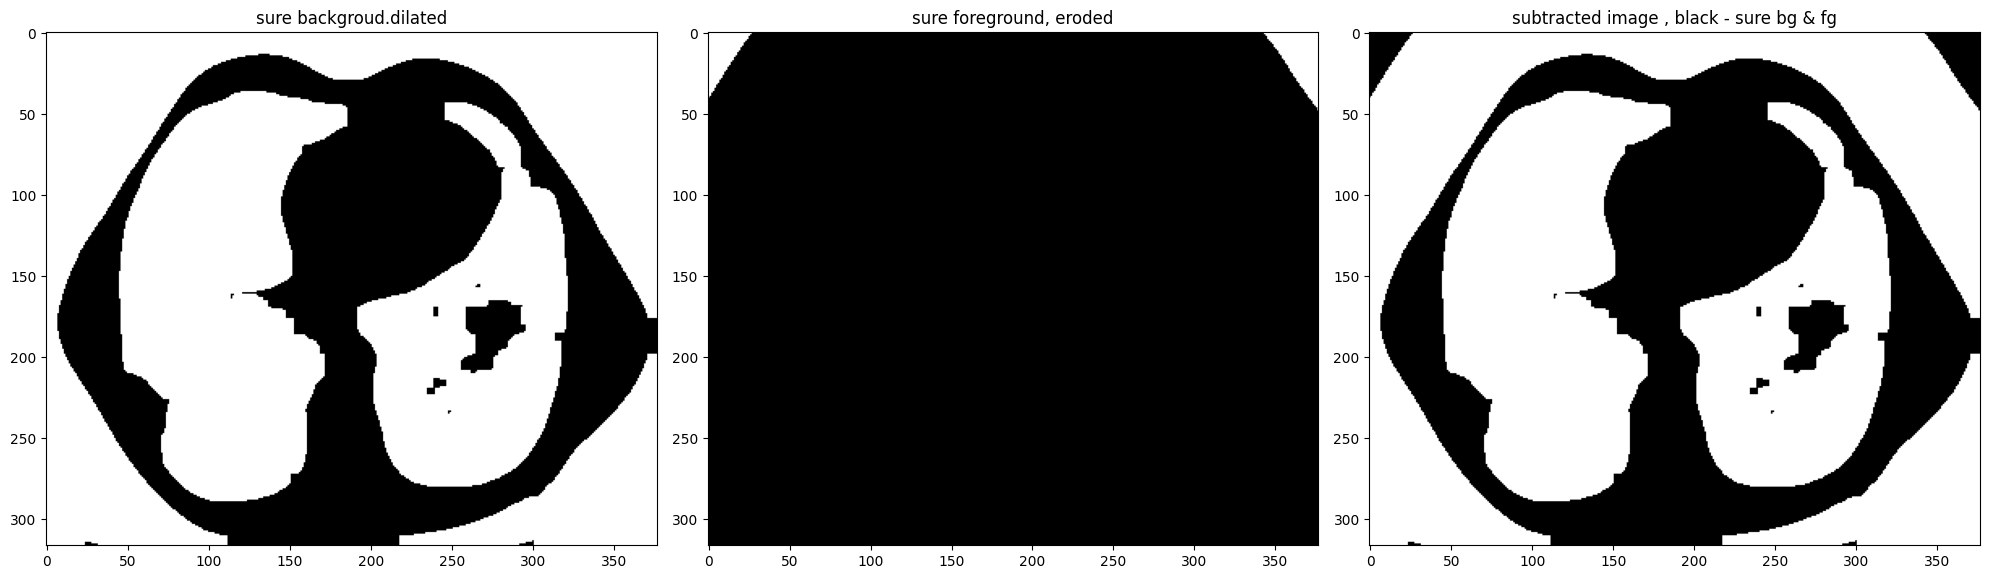

In [ ]:
fig = plt.figure(figsize= (20,10))
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('sure backgroud.dilated')
plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('sure foreground, eroded')
plt.subplot(133)
plt.imshow(unknown,cmap = 'gray')
plt.title('subtracted image , black - sure bg & fg')
plt.tight_layout()

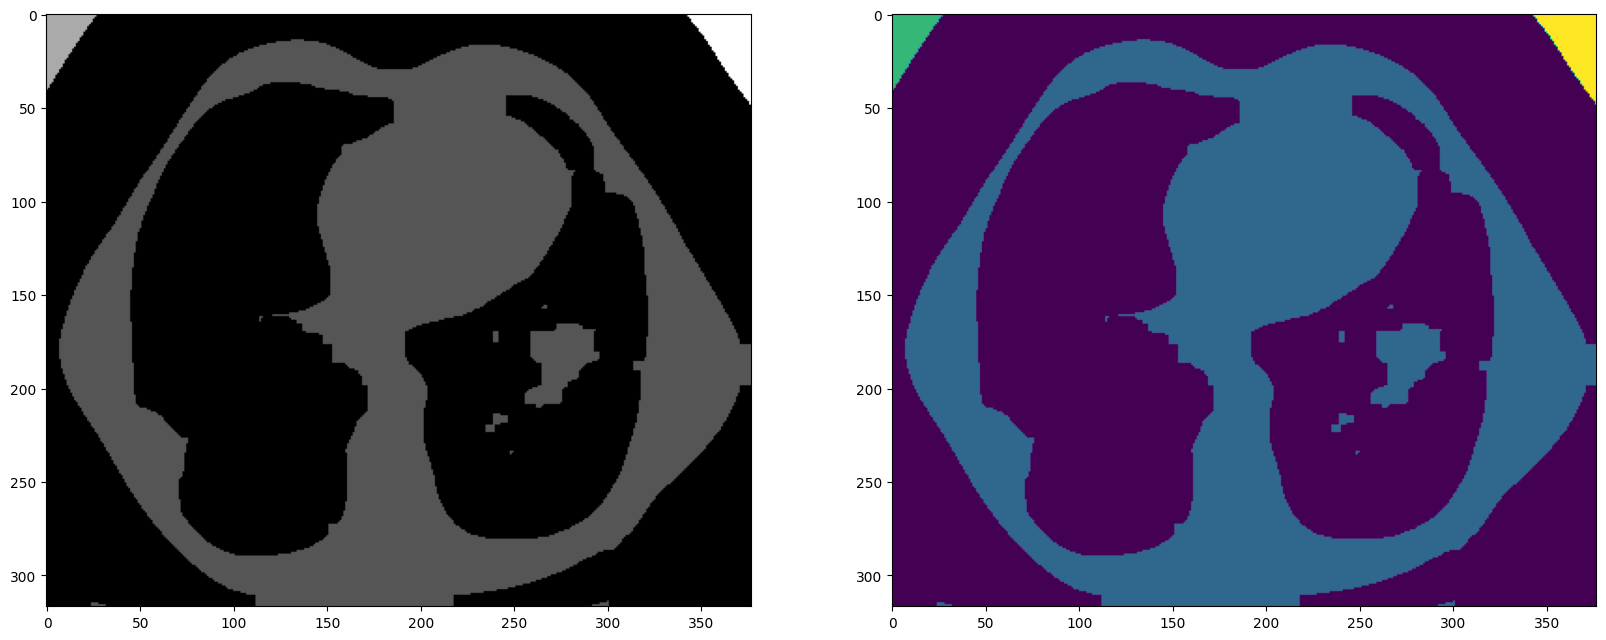

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown == 255] = 0
fig = plt.figure(figsize = (20,10))
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)


In [ ]:
markers = cv2.watershed(img,markers)
img[markers==-1]=[0,255,0]

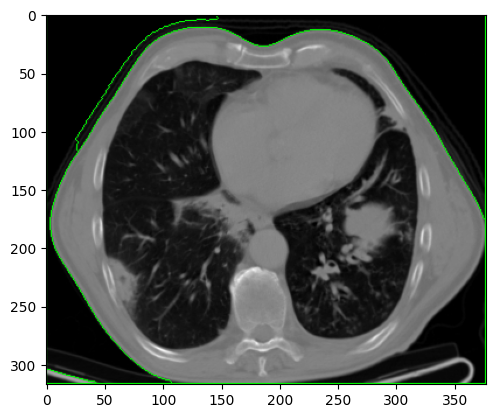

In [ ]:
plt.imshow(img)